## The following project is to analyse the NBA player performance and construct a model to predict how many points a player scores and a model to predict whether a team will win or lose.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from scipy import stats as scipy
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [2]:
#path = "C:/Users/taihs/OneDrive/Documents/SGunited Data Analyst/all_seasons.csv"
#path = "C:/Users/taihs/OneDrive/Documents/SGunited Data Analyst/games.csv"
#df1 = pd.read_csv(path)

cnxn = pyodbc.connect(r'Driver={SQL Server};Server=localhost;Database=nba;Trusted_Connection=yes;')
sql = "select * from vw_nba"
df = pd.read_sql(sql, cnxn)
sql1 = "select * from Game_Stats"
df1 = pd.read_sql(sql1, cnxn)

In [3]:
df1.describe()

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
count,2.309600e+04,2.309600e+04,2.309600e+04,23096.000000,2.309600e+04,23096.000000,23096.000000,23096.000000,23096.000000,23096.000000,23096.000000,2.309600e+04,23096.000000,23096.000000,23096.000000,23096.000000,23096.000000,23096.000000,23096.000000
mean,2.161222e+07,1.610613e+09,1.610613e+09,2010.877771,1.610613e+09,102.149117,0.459901,0.757874,0.355458,22.512253,43.174359,1.610613e+09,99.168254,0.448125,0.756188,0.348710,21.099974,41.850061,0.594865
std,5.412957e+06,8.652800e+00,8.664415e+00,4.812789,8.652800e+00,12.902191,0.056794,0.100397,0.114683,5.153124,6.597023,8.664415e+00,12.947992,0.055589,0.103148,0.112754,5.080440,6.495695,0.490929
min,1.030000e+07,1.610613e+09,1.610613e+09,2003.000000,1.610613e+09,36.000000,0.250000,0.143000,0.000000,6.000000,15.000000,1.610613e+09,33.000000,0.244000,0.143000,0.000000,4.000000,19.000000,0.000000
25%,2.060066e+07,1.610613e+09,1.610613e+09,2007.000000,1.610613e+09,93.000000,0.420000,0.696000,0.281000,19.000000,39.000000,1.610613e+09,90.000000,0.410000,0.692000,0.273000,18.000000,37.000000,0.000000
50%,2.110029e+07,1.610613e+09,1.610613e+09,2011.000000,1.610613e+09,102.000000,0.459000,0.765000,0.355000,22.000000,43.000000,1.610613e+09,99.000000,0.447000,0.762000,0.348000,21.000000,42.000000,1.000000
75%,2.160015e+07,1.610613e+09,1.610613e+09,2015.000000,1.610613e+09,111.000000,0.500000,0.826000,0.429000,26.000000,48.000000,1.610613e+09,108.000000,0.486000,0.828000,0.421000,24.000000,46.000000,1.000000
max,4.180041e+07,1.610613e+09,1.610613e+09,2019.000000,1.610613e+09,168.000000,0.684000,1.000000,1.000000,47.000000,72.000000,1.610613e+09,168.000000,0.674000,1.000000,1.000000,46.000000,81.000000,1.000000


In [4]:
df1.head()
df1.dropna()
df1.describe()

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
count,2.309600e+04,2.309600e+04,2.309600e+04,23096.000000,2.309600e+04,23096.000000,23096.000000,23096.000000,23096.000000,23096.000000,23096.000000,2.309600e+04,23096.000000,23096.000000,23096.000000,23096.000000,23096.000000,23096.000000,23096.000000
mean,2.161222e+07,1.610613e+09,1.610613e+09,2010.877771,1.610613e+09,102.149117,0.459901,0.757874,0.355458,22.512253,43.174359,1.610613e+09,99.168254,0.448125,0.756188,0.348710,21.099974,41.850061,0.594865
std,5.412957e+06,8.652800e+00,8.664415e+00,4.812789,8.652800e+00,12.902191,0.056794,0.100397,0.114683,5.153124,6.597023,8.664415e+00,12.947992,0.055589,0.103148,0.112754,5.080440,6.495695,0.490929
min,1.030000e+07,1.610613e+09,1.610613e+09,2003.000000,1.610613e+09,36.000000,0.250000,0.143000,0.000000,6.000000,15.000000,1.610613e+09,33.000000,0.244000,0.143000,0.000000,4.000000,19.000000,0.000000
25%,2.060066e+07,1.610613e+09,1.610613e+09,2007.000000,1.610613e+09,93.000000,0.420000,0.696000,0.281000,19.000000,39.000000,1.610613e+09,90.000000,0.410000,0.692000,0.273000,18.000000,37.000000,0.000000
50%,2.110029e+07,1.610613e+09,1.610613e+09,2011.000000,1.610613e+09,102.000000,0.459000,0.765000,0.355000,22.000000,43.000000,1.610613e+09,99.000000,0.447000,0.762000,0.348000,21.000000,42.000000,1.000000
75%,2.160015e+07,1.610613e+09,1.610613e+09,2015.000000,1.610613e+09,111.000000,0.500000,0.826000,0.429000,26.000000,48.000000,1.610613e+09,108.000000,0.486000,0.828000,0.421000,24.000000,46.000000,1.000000
max,4.180041e+07,1.610613e+09,1.610613e+09,2019.000000,1.610613e+09,168.000000,0.684000,1.000000,1.000000,47.000000,72.000000,1.610613e+09,168.000000,0.674000,1.000000,1.000000,46.000000,81.000000,1.000000


In [5]:
#scipy.pearsonr(df['gp'],df['pts'])
df['college'].value_counts()

None                   1671
Kentucky                363
Duke                    331
North Carolina          318
UCLA                    283
                       ... 
Lebanon Valley            1
Coppin State              1
George Mason              1
Miami (Fla.)              1
Wisconsin-Green Bay       1
Name: college, Length: 303, dtype: int64

### This is to test whether Age will impact Points as follows:

In [6]:
df.loc[(df['age'] <= 25), 'age_group'] = '25 years and younger'
df.loc[(df['age'] > 25)&(df['age'] < 31), 'age_group'] = 'between 26 and 30 years'
df.loc[(df['age'] >= 31), 'age_group'] = '31 years and older'

group_one = df[df['age_group'] == '25 years and younger']['pts']
group_two = df[df['age_group'] == 'between 26 and 30 years']['pts']
group_three = df[df['age_group'] == '31 years and older']['pts']

f_statistic, p_value = scipy.stats.f_oneway(group_one, group_two, group_three)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 81.10688326763722, P-Value: 1.0707233856514145e-35


### This is to test whether Age will impact Rebounds as follows:

In [7]:
group_one = df[df['age_group'] == '25 years and younger']['reb']
group_two = df[df['age_group'] == 'between 26 and 30 years']['reb']
group_three = df[df['age_group'] == '31 years and older']['reb']

f_statistic, p_value = scipy.stats.f_oneway(group_one, group_two, group_three)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 39.95286761004783, P-Value: 5.135849986692171e-18


### This is to test whether Country will impact Points as follows:

In [8]:
df.loc[(df['country'] == 'USA')&(df['year'] == '2019'), 'ctry_group'] = 'ctry_one'
df.loc[(df['country'] == 'CAN')&(df['year'] == '2019'), 'ctry_group'] = 'ctry_two'
df.loc[(df['country'] == 'FRA')&(df['year'] == '2019'), 'ctry_group'] = 'ctry_two'
df.loc[(df['country'] == 'AUS')&(df['year'] == '2019'), 'ctry_group'] = 'ctry_three'
df.loc[(df['country'] == 'CRO')&(df['year'] == '2019'), 'ctry_group'] = 'ctry_three'

group_one = df[df['ctry_group'] == 'ctry_one']['pts']
group_two = df[df['ctry_group'] == 'ctry_two']['pts']
group_three = df[df['ctry_group'] == 'ctry_three']['pts']

f_statistic, p_value = scipy.stats.f_oneway(group_one, group_two, group_three)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 0.23530969690495612, P-Value: 0.790427752005635


### This is to test where College will impact Points as follows:

In [9]:
df.loc[(df['college'] == 'None')&(df['year'] == '2019'), 'coll_group'] = 'coll_one'
df.loc[(df['college'] == 'Kentucky')&(df['year'] == '2019'), 'coll_group'] = 'coll_two'
df.loc[(df['college'] == 'Duke')&(df['year'] == '2019'), 'coll_group'] = 'coll_two'
df.loc[(df['college'] == 'UCLA')&(df['year'] == '2019'), 'coll_group'] = 'coll_three'
df.loc[(df['college'] == 'North Carolina')&(df['year'] == '2019'), 'coll_group'] = 'coll_three'

group_one = df[df['coll_group'] == 'coll_one']['pts']
group_two = df[df['coll_group'] == 'coll_two']['pts']
group_three = df[df['coll_group'] == 'coll_three']['pts']

f_statistic, p_value = scipy.stats.f_oneway(group_one, group_two, group_three)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 12.992839352954768, P-Value: 5.163448865578212e-06


### This is a Polynomial Regression Prediction Model as follows:

In [10]:
#Z = df[['age', 'gp', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']]
#Z1 = df[['age', 'gp', 'reb', 'ast', 'oreb_pct', 'dreb_pct', 'ts_pct', 'ast_pct']]
Z1 = df[['age', 'gp', 'reb', 'ast']]
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(Z1,df['pts'])
#arr = np.array([28,58,8,8,4.4,0.028,0.186,0.308,0.581,0.18])
#arr = np.array([28,58,10,10,0.028,0.186,0.581,0.18])
arr = np.array([28,58,8,8])
X = arr.reshape(1, -1)
yhat = pipe.predict(X)
print(yhat)
pipe.named_steps['model'].coef_
pipe.score(Z1,df['pts'])

[24.03090623]


0.7291650202862404

### This is a Multiple Linear Regression Prediction Model as follows:

In [11]:
#Z = df[['age', 'gp', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']]
#Z = df[['age', 'gp', 'reb', 'ast', 'oreb_pct', 'dreb_pct', 'ts_pct', 'ast_pct']]
Z = df[['age', 'gp', 'reb', 'ast']]
lm = LinearRegression()
lm.fit(Z, df['pts'])
lm.score(Z, df['pts'])
#Y_predict_multifit = lm.predict(Z)
#mean_squared_error(df['pts'], Y_predict_multifit)
#arr = np.array([28,58,10,10,4.4,0.028,0.186,0.308,0.581,0.18])
#arr = np.array([28,58,10,10,0.028,0.186,0.581,0.18])
arr = np.array([38,58,8,8])
X = arr.reshape(1, -1)
yhat = lm.predict(X)
print(yhat)
#lm.intercept_
lm.score(Z, df['pts'])

[22.45249842]


0.6828820947273216

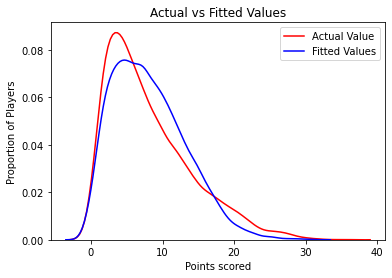

In [12]:
yhat = pipe.predict(Z)

#plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['pts'], hist=False, color="r", label="Actual Value")
sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values')
plt.xlabel('Points scored')
plt.ylabel('Proportion of Players')

plt.show()
plt.close()

(0.0, 17.114999198913573)

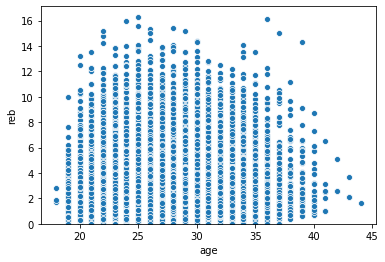

In [13]:
sns.scatterplot(x='age',y='reb',data=df)
plt.ylim(0,)

### This is a Logistic Regression Prediction Model for Team Win or Loss as follows:

In [14]:
Z = df1[['FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'AST_away', 'REB_away']]
logisticRegr = LogisticRegression(max_iter=200)
logisticRegr.fit(Z, df1['HOME_TEAM_WINS'])
#Y_predict_multifit = lm.predict(Z)
#mean_squared_error(df['pts'], Y_predict_multifit)
#arr = np.array([28,58,10,10,4.4,0.028,0.186,0.308,0.581,0.18])
#arr = np.array([28,58,10,10,0.028,0.186,0.581,0.18])
arr = np.array([0.4,0.7,0.3,22,55,15,20])
X = arr.reshape(1, -1)
yhat = logisticRegr.predict(X)
print(yhat)
#lm.intercept_
logisticRegr.score(Z, df1['HOME_TEAM_WINS'])
#logisticRegr.coef_

[1]


0.8000086595081399

In [15]:
df.corr()

,age,height,weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,uuid
age,1.000000,-0.013981,0.046904,0.046221,-0.000810,0.028319,0.083695,0.088161,-0.064672,0.012451,-0.133839,0.025627,0.063037,-0.015020
height,-0.013981,1.000000,0.829901,-0.005844,-0.059748,0.422547,-0.463908,-0.009260,0.589033,0.614650,-0.110438,0.069810,-0.632000,0.017577
weight,0.046904,0.829901,1.000000,0.009308,-0.032130,0.436762,-0.395356,-0.000503,0.603258,0.606327,-0.074495,0.060416,-0.547487,-0.014730
gp,0.046221,-0.005844,0.009308,1.000000,0.543846,0.471562,0.388840,0.251260,-0.021649,0.060702,0.138119,0.389950,0.134544,0.007835
pts,-0.000810,-0.059748,-0.032130,0.543846,1.000000,0.623909,0.652098,0.217883,-0.121267,0.048110,0.633110,0.382417,0.322214,-0.001679
reb,0.028319,0.422547,0.436762,0.471562,0.623909,1.000000,0.224217,0.190416,0.411597,0.606899,0.221804,0.314563,-0.087725,-0.022322
ast,0.083695,-0.463908,-0.395356,0.388840,0.652098,0.224217,1.000000,0.165236,-0.349217,-0.215141,0.378803,0.180234,0.802008,-0.000966
net_rating,0.088161,-0.009260,-0.000503,0.251260,0.217883,0.190416,0.165236,1.000000,0.056177,0.036148,-0.004305,0.309536,0.060158,0.012476
oreb_pct,-0.064672,0.589033,0.603258,-0.021649,-0.121267,0.411597,-0.349217,0.056177,1.000000,0.552462,-0.102698,0.066285,-0.443269,-0.006971
dreb_pct,0.012451,0.614650,0.606327,0.060702,0.048110,0.606899,-0.215141,0.036148,0.552462,1.000000,-0.028883,0.098745,-0.346278,-0.032344
